In [1]:
import cv2 as cv
import cv2
from PIL import Image
import numpy as np
#from google.colab.patches import cv2_imshow
import math
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage.measure import label
from sklearn.feature_extraction import image
import time

from skimage.transform import AffineTransform, warp
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.transform import hough_line, hough_line_peaks
from skimage.draw import circle_perimeter, line
from skimage.feature import canny
from skimage import color
from skimage import io

In [5]:
img = Image.open('vid1/video-frame00001.png')

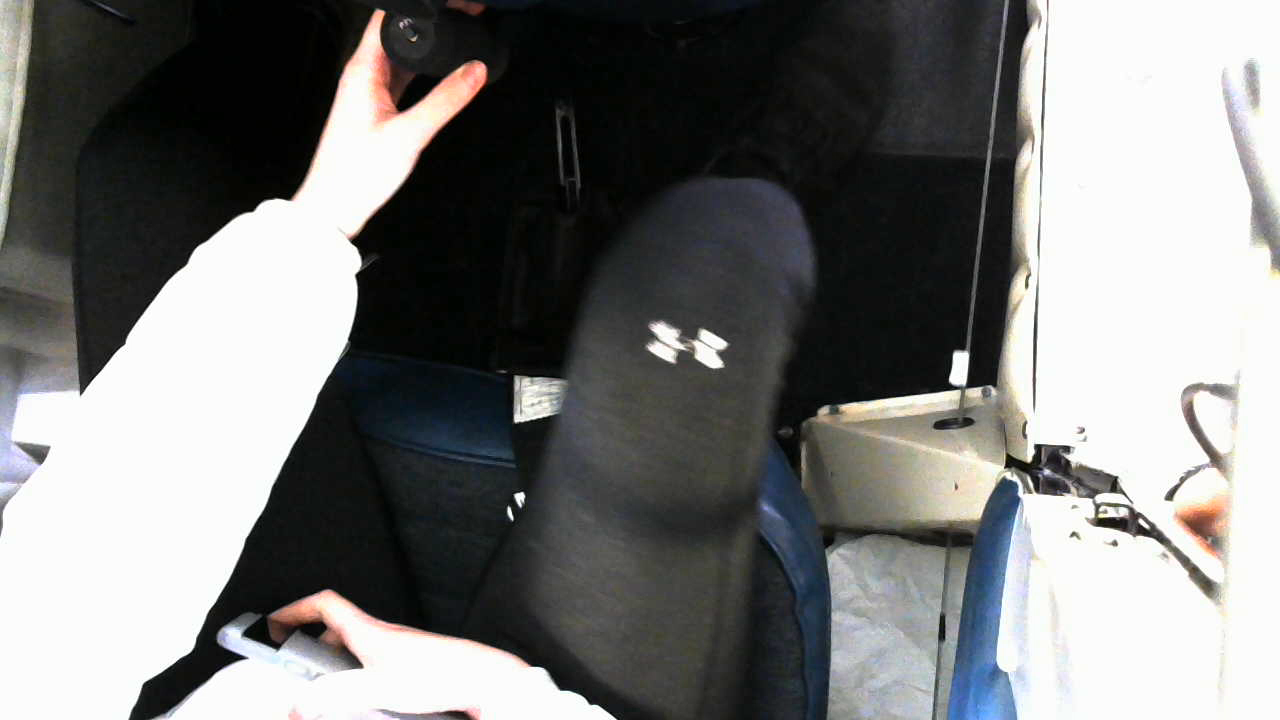

In [6]:
img

In [7]:
im = np.array(img)

In [8]:
im.shape

(720, 1280, 3)

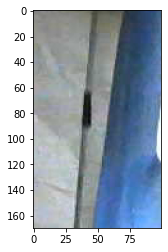

In [22]:
plt.imshow(im[550:720, 900:1000])

In [23]:
cable_patch = im[550:720, 900:1000]

In [19]:
(cable_patch<[10,10,10]).shape

(170, 200, 3)

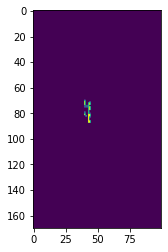

In [24]:
plt.imshow((cable_patch<[20,20,20]).astype(int).sum(axis=2))

In [26]:
indicator_img = (cable_patch<[20,20,20]).astype(int).sum(axis=2)

In [27]:
indicator_px = np.transpose(np.where(indicator_img>0))

In [29]:
rel_loc = [np.mean(indicator_px[:,0]), np.mean(indicator_px[:,1])]

In [30]:
rel_loc

[77.85714285714286, 42.45238095238095]

In [31]:
abs_loc = [rel_loc[0] + 550, rel_loc[1]+900]

In [32]:
abs_loc

[627.8571428571429, 942.452380952381]

In [34]:
def get_cable_loc(im):
    cable_patch = im[550:720, 900:1000]
    indicator_img = (cable_patch<[20,20,20]).astype(int).sum(axis=2)
    indicator_px = np.transpose(np.where(indicator_img>0))
    rel_loc = [np.mean(indicator_px[:,0]), np.mean(indicator_px[:,1])]
    abs_loc = [rel_loc[0] + 550, rel_loc[1]+900]
    return abs_loc

In [35]:
get_cable_loc(im)

[627.8571428571429, 942.452380952381]

In [41]:
locs = []
for i in range(1,271):
    img = Image.open(f"vid1/video-frame{i:05}.png")
    im = np.array(img)
    loc = get_cable_loc(im)
    locs.append(loc)
locs = np.array(locs)

In [42]:
locs

array([[627.85714286, 942.45238095],
       [631.20338983, 942.37288136],
       [632.4       , 942.21428571],
       [632.43548387, 942.        ],
       [628.14545455, 941.21818182],
       [623.73684211, 942.21052632],
       [615.1       , 942.96666667],
       [609.71428571, 944.35714286],
       [599.44444444, 946.47222222],
       [592.46153846, 947.96153846],
       [582.11111111, 948.69444444],
       [575.82608696, 948.30434783],
       [573.61666667, 948.78333333],
       [572.        , 948.26229508],
       [571.69230769, 949.46153846],
       [565.36923077, 949.90769231],
       [562.28985507, 949.11594203],
       [559.87096774, 949.96774194],
       [562.92307692, 949.53846154],
       [566.07142857, 949.03571429],
       [572.33333333, 948.5       ],
       [582.875     , 947.1875    ],
       [591.48275862, 946.55172414],
       [605.57894737, 944.44736842],
       [618.42857143, 942.28571429],
       [625.15789474, 941.84210526],
       [633.60465116, 941.34883721],
 

Text(0.5, 1.0, "cable tape's 2D position over time")

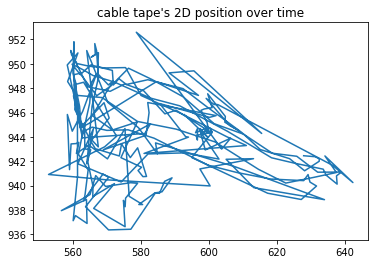

In [50]:
plt.plot(locs[:,0], locs[:,1])
plt.title("cable tape's 2D position over time")

In [47]:
# trust the vertical direction

lower_r = np.min(locs[:,0])
upper_r = np.max(locs[:,0])
range_r = upper_r - lower_r

# demean
demeaned_locs = locs[:,0] - (upper_r + lower_r)/2
# scale down
scaled_locs = demeaned_locs/range_r*2

Text(0.5, 1.0, "cable tape's relative vertical position over time")

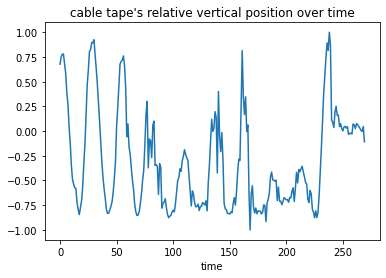

In [53]:
plt.plot(scaled_locs)
plt.xlabel("time")
plt.title("cable tape's relative vertical position over time")

In [55]:
def calibrate_cable():
    locs = []
    for i in range(1,271):
        img = Image.open(f"vid1/video-frame{i:05}.png") # next image of cable
        im = np.array(img)
        loc = get_cable_loc(im)
        locs.append(loc)
    locs = np.array(locs)
    
    lower_r = np.min(locs[:,0])
    upper_r = np.max(locs[:,0])
    middle_r = (upper_r + lower_r)/2
    range_r = upper_r - lower_r
    
    return middle_r, range_r

In [67]:
middle_r, range_r

(597.6418495297805, 89.35266457680245)

In [64]:
def get_cable_pos(im, middle_r, range_r):
    abs_r = get_cable_loc(im)[0]
    scaled_r = (abs_r - middle_r)/range_r*2
    return scaled_r

In [65]:
# realistic implementation
all_cable_pos = []

middle_r, range_r = calibrate_cable()
for i in range(1,200):
    im = np.array(Image.open(f"vid1/video-frame{i:05}.png"))
    cable_pos = get_cable_pos(im, middle_r, range_r)
    all_cable_pos.append(cable_pos)

Text(0.5, 1.0, 'Cable position over time')

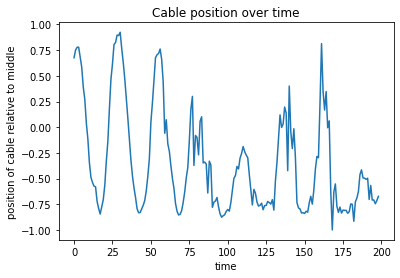

In [66]:
plt.plot(all_cable_pos)
plt.xlabel("time")
plt.ylabel("position of cable relative to middle")
plt.title("Cable position over time")